In [1]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import binom

import matplotlib
from matplotlib import pyplot as plt

In [2]:
def init_matplotlib(figsize=(16, 6), bgcolor="#FFFFFF"):
    matplotlib.rcParams["figure.figsize"] = figsize
    matplotlib.rcParams["figure.facecolor"] = bgcolor

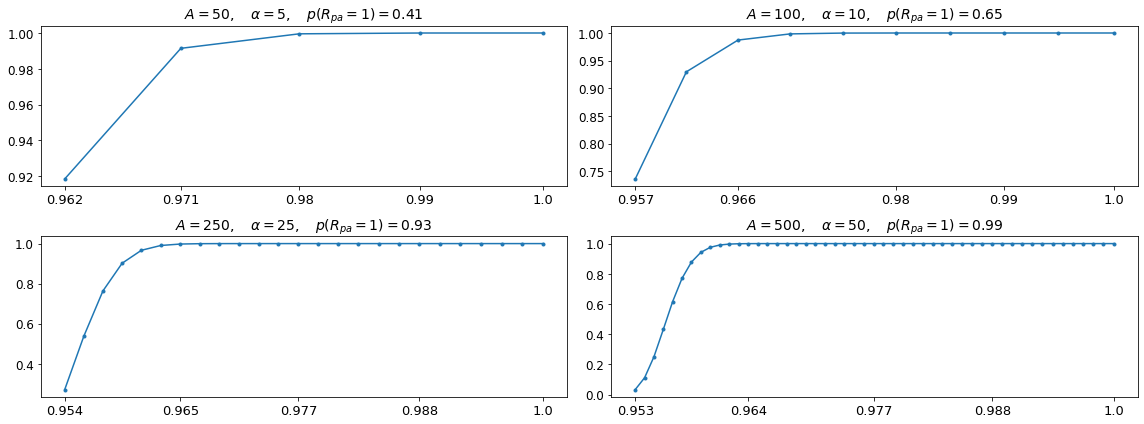

In [3]:
# r: contamination rate
# A: number of anomalous points
# T: total number of points (T = A / r)
# h: percentage of random points tagged as anomalous
# alpha: number of random points tagged as anomalous (alpha = T * h)

init_matplotlib(figsize=(16, 6))

r = 0.1
h = 0.01

for i, A in enumerate([50, 100, 250, 500]):

    T = A / 0.1
    alpha = int(T * h)

    # nb hits of anomalous segment
    n_hits = np.arange(0, alpha + 1)
    # point-adjust True Positive
    TP_pa = np.array([0 if n == 0 else A for n in n_hits])

    # probability of perfect point-adjust recall
    proba_perfect_R_pa = 1 - (1 - r) ** alpha

    # point-adjust precision for each number of hits
    # this is an array, so we have one P_pa value for each n_hits
    P_pa = TP_pa / (TP_pa + alpha - n_hits)

    # point-adjust F1 score
    # point-adjust Recall = 1 (with different probabilities!)
    # for one single anomalous segment. This is also an array
    F1_pa = (2 * P_pa * 1) / (P_pa + 1 + 1e-10)

    # we can use the binomial distribution to compute the probability
    # of hitting the anomalous segment a given number of times. We have:
    # n=alpha, k=n_hits and p=r
    
    # We're more interested in the Cumulative Distribution Function for each number
    # of hits, that is, the probabilitity of hitting the anomalous segments at least
    # 'n_hits'. These are also the probabilitities of obtaining a point-adjust F1
    # scores below the values computed in F1_pa
    cdf = binom.cdf(k=n_hits, n=alpha, p=r)


    # For convenience, we skip the first value in F1_pa and cdf
    # See next figure with this value included
    F1_pa, cdf = F1_pa[1:], cdf[1:]
    plt.subplot(2, 2, i + 1)
    plt.plot(F1_pa, cdf, ".-")

    plt.title(
        f"$A={A}, \quad \\alpha={alpha}, \quad$"
        + "$p(R_"
        + "{"
        + "pa"
        + "}=1)="
        + f"{round(proba_perfect_R_pa, 2)}$",
        fontsize=14,
    )
    
    
    indices = [0, len(F1_pa) // 4, len(F1_pa) // 2, int(len(F1_pa) / 4 * 3), len(F1_pa) - 1]
    x_ticks_pos = F1_pa[indices]
    x_ticks_val = np.round(x_ticks_pos, 3)
    plt.xticks(x_ticks_pos, x_ticks_val)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=12)
    plt.tight_layout()

In [ ]:
init_matplotlib(figsize=(16, 3))

r = 0.1
h = 0.01

for i, A in enumerate([50, 500]):

    T = A / 0.1
    alpha = int(T * h)

    # nb hits of anomalous segment
    n_hits = np.arange(0, alpha + 1)
    # point-adjust True Positive
    TP_pa = np.array([0 if n == 0 else A for n in n_hits])

    # probability of perfect point-adjust recall
    proba_perfect_R_pa = 1 - (1 - r) ** alpha

    # point-adjust precision for each number of hits
    P_pa = TP_pa / (TP_pa + alpha - n_hits)
    F1_pa = (2 * P_pa * 1) / (P_pa + 1 + 1e-10)

    cdf = binom.cdf(k=n_hits, n=alpha, p=r)

    plt.subplot(1, 2, i + 1)
    plt.plot(F1_pa, cdf, ".-")

    plt.title(
        f"$A={A}, \quad \\alpha={alpha}, \quad$"
        + "$p(R_"
        + "{"
        + "pa"
        + "}=1)="
        + f"{round(proba_perfect_R_pa, 2)}$",
        fontsize=14,
    )

    plt.tight_layout()